In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
# 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('report_nopoker.csv',sep='\t')
print(df['endpoint_type'].unique())
df['endpoint_type'] = le.fit_transform(df['endpoint_type'].values)
print('df[:10]',df[:10])
print(df['endpoint_type'].unique())

['binary' 'integer']
df[:10]                                              Dataset  #instances  #features  \
0  GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...        1600       1000   
1    GAMETES_Epistasis_2-Way_20atts_0.1H_EDM-1_1.csv        1600         20   
2    GAMETES_Epistasis_2-Way_20atts_0.4H_EDM-1_1.csv        1600         20   
3    GAMETES_Epistasis_3-Way_20atts_0.2H_EDM-1_1.csv        1600         20   
4  GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...        1600         20   
5  GAMETES_Heterogeneity_20atts_1600_Het_0.4_0.2_...        1600         20   
6                         Hill_Valley_with_noise.csv        1212        100   
7                      Hill_Valley_without_noise.csv        1212        100   
8                                          adult.csv       48842         14   
9                               agaricus-lepiota.csv        8145         22   

   #binary_features  #integer_features  #float_features  endpoint_type  \
0                31        

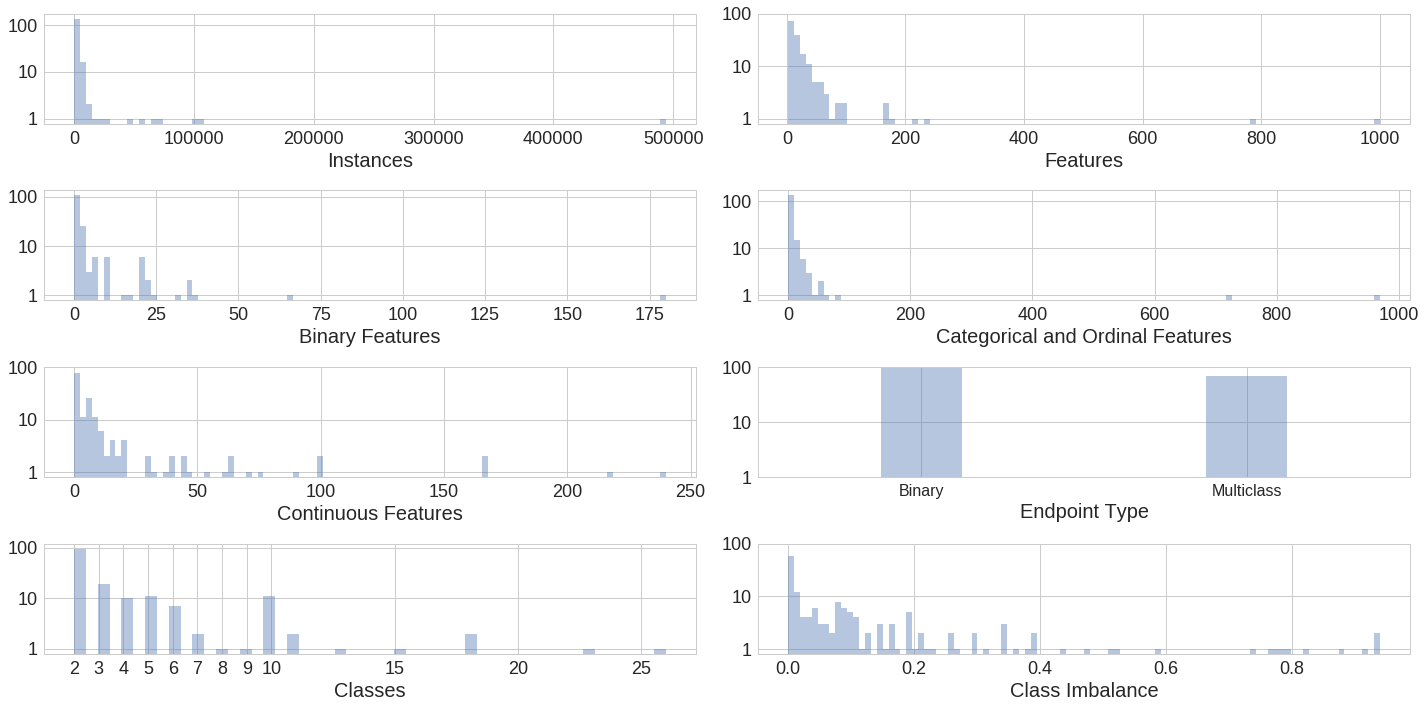

In [4]:
# histogram plot of features
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter



nice_cols = {
    '#instances': 'Instances',
    '#features': 'Features',
    '#binary_features': 'Binary Features',
    '#integer_features': 'Categorical and Ordinal Features',
    '#float_features': 'Continuous Features',
    'endpoint_type': 'Endpoint Type',
    '#classes': 'Classes',
    'Imbalance_metric': 'Class Imbalance'
}
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

h = plt.figure()#figsize=(1,1)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style("whitegrid")
for i,col in enumerate(df.columns[1:]):

    ax=plt.subplot(4,2,i+1)   
#     ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    if col =='endpoint_type':
        sns.distplot(df[col],kde=False,bins=2,hist_kws={"rwidth":0.25})
        plt.xlim(0,1)
        plt.gca().set_xticks((0.25,0.75))
        plt.gca().set_xticklabels(('Binary','Multiclass'),size=16)
        plt.ylim(1,100)
    elif col == '#classes':
        sns.distplot(df[col],kde=False,bins=50,hist_kws={"rwidth":2})
        plt.gca().set_xticks((2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25))
    else:
        sns.distplot(df[col],kde=False,bins=100,hist_kws={"rwidth":1})
    
        
    plt.xlabel(nice_cols[col],size=20)   
    plt.yscale('log', nonposy='clip')
    plt.yticks((1,10,100))
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.set_major_formatter(FormatStrFormatter('%i'))

#     yticks = plt.gca().get_yticks()
#     plt.set(ax,dpi=300)
# h=plt.gcf()
# 

h.tight_layout()
h.savefig('figs/data_feature_hist.pdf')
h.savefig('figs/data_feature_hist.png')
plt.show()

In [38]:
# x, y = np.random.multivariate_normal(mean, cov, 1000).T
# with sns.axes_style("white"):
sns.jointplot(x='#instances', y='#features', data=df)#,kind="hex", color="k");
# plt.text(df['#instances'].values+1,df['#features'].values,df['Dataset'].values)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9161077d90> (for post_execute):


TypeError: only length-1 arrays can be converted to Python scalars

TypeError: only length-1 arrays can be converted to Python scalars

100%|██████████| 18/18 [00:00<00:00, 31.44it/s]


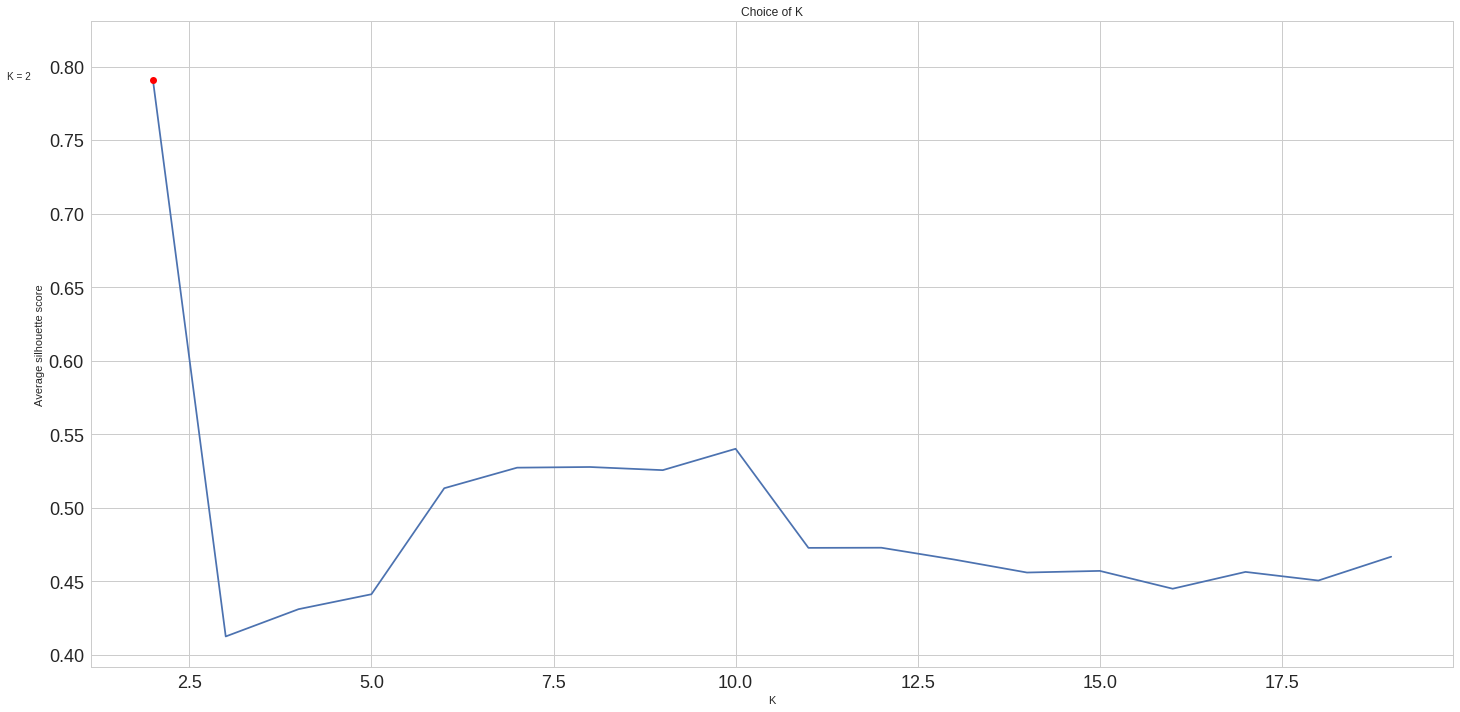

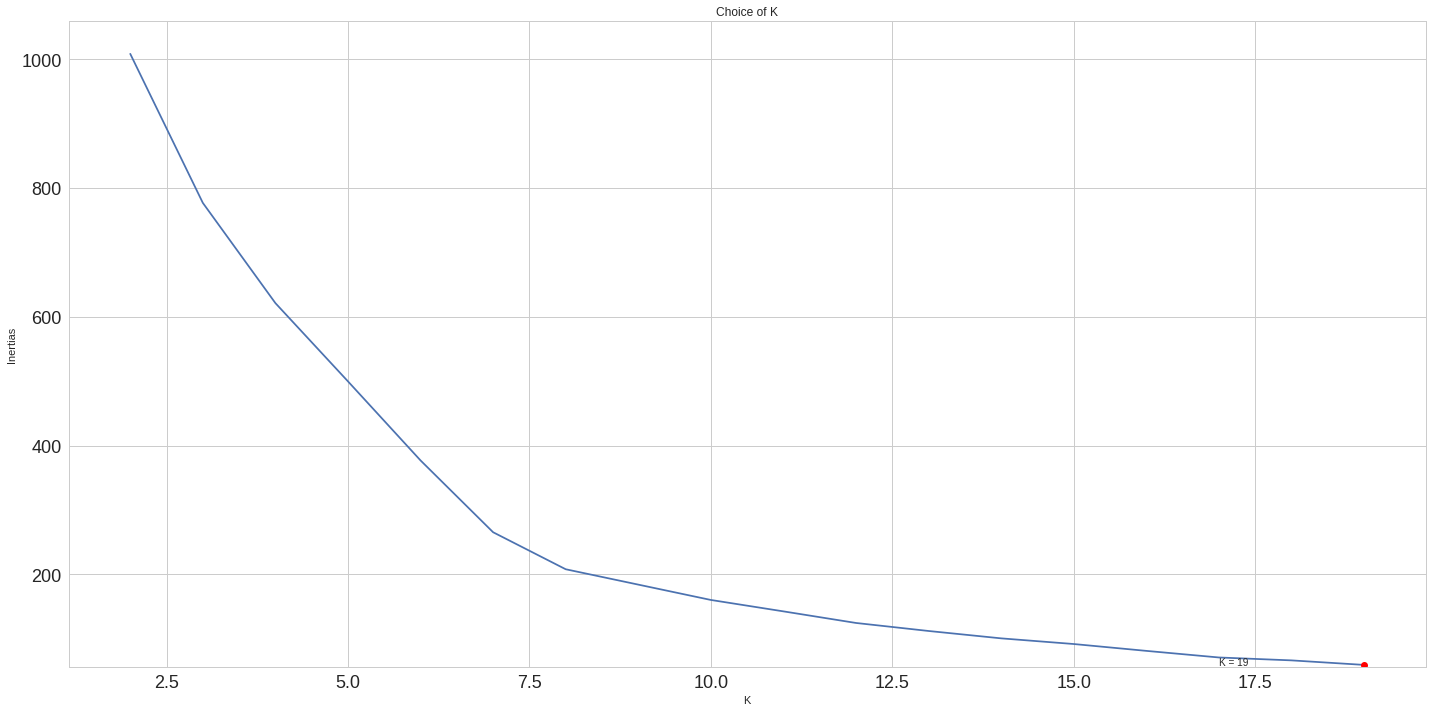

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.preprocessing import StandardScaler
import numpy
import pdb
from tqdm import tqdm
#==========
# optimal K via elbow method with silhouette score which produces a better elbow.
#==========
ss = StandardScaler()
X = ss.fit_transform(df.drop('Dataset',axis=1).values)
# pdb.set_trace()
Ks = np.arange(2,20,1)
Inertias = []
Silhouettes = []
np.random.seed(2)
# loop through k values
for K in tqdm(Ks):
	km = KMeans(n_clusters=K, init='k-means++',copy_x=False).fit(X)
	labels = km.labels_
	centers = km.cluster_centers_
	inertia = km.inertia_
	Silhouettes.append(silhouette_score(X,labels))
	# Inertias[K-1] = km.inertia_
	Inertias.append(km.inertia_)

# line plot of K versus Silhouette score with best value marked with x 
plt.figure(1)
plt.plot(Ks,Silhouettes,label='silhouette')
plt.plot(Ks[np.argmax(Silhouettes)],Silhouettes[np.argmax(Silhouettes)],marker = 'o',color='r',markersize=7)
plt.text(Ks[np.argmax(Silhouettes)]-2,Silhouettes[np.argmax(Silhouettes)],"K = "+repr(Ks[np.argmax(Silhouettes)]))
plt.ylim(0.95*np.min(Silhouettes),1.05*np.max(Silhouettes),'x')
plt.ylabel("Average silhouette score") #Y-axis label
plt.xlabel("K") #X-axis label
plt.title("Choice of K") #Plot title
plt.tight_layout()
# plt.savefig("k_silhouette_data-features.pdf")

plt.figure(2)
plt.plot(Ks,Inertias,label='inertia')
plt.plot(Ks[np.argmin(Inertias)],Inertias[np.argmin(Inertias)],marker = 'o',color='r',markersize=7)
plt.text(Ks[np.argmin(Inertias)]-2,Inertias[np.argmin(Inertias)],"K = "+repr(Ks[np.argmin(Inertias)]))
plt.ylim(0.95*np.min(Inertias),1.05*np.max(Inertias))
plt.ylabel("Inertias") #Y-axis label
plt.xlabel("K") #X-axis label
plt.title("Choice of K") #Plot title
plt.tight_layout()
# plt.savefig("k_inertia_data-features.pdf")

explained variance: [ 0.274563    0.49895352  0.65848273  0.77250202  0.88139719  0.96460656
  1.          1.        ]
k: 0
col: [ 0.12156863  0.46666667  0.70588235  1.        ]
k%nc: 0
k: 1
col: [ 1.          0.49803922  0.05490196  1.        ]
k%nc: 1
k: 2
col: [ 0.17254902  0.62745098  0.17254902  1.        ]
k%nc: 2
k: 3
col: [ 0.83921569  0.15294118  0.15686275  1.        ]
k%nc: 3
k: 4
col: [ 0.58039216  0.40392157  0.74117647  1.        ]
k%nc: 4
k: 0
col: [ 0.12156863  0.46666667  0.70588235  1.        ]
k%nc: 0
k: 1
col: [ 1.          0.49803922  0.05490196  1.        ]
k%nc: 1
k: 2
col: [ 0.17254902  0.62745098  0.17254902  1.        ]
k%nc: 2
k: 3
col: [ 0.83921569  0.15294118  0.15686275  1.        ]
k%nc: 3
k: 4
col: [ 0.58039216  0.40392157  0.74117647  1.        ]
k%nc: 4
labels: [2 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 0 1 1 1 1 1 1 0 1 0 0 1 3 3 1 1 0 3 0 1 1
 1 1 1 1 1 1 0 3 0 0 0 1 1 1 1 1 0 0 0 0 3 1 0 0 0 0 1 1 1 1 0 1 3 3 0 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 3 1 0 1 4 1 0 1 

/home/bill/anaconda3/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/bill/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:62: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


features: Index(['#instances', '#features', '#binary_features', '#integer_features',
       '#float_features', 'endpoint_type', '#classes', 'Imbalance_metric'],
      dtype='object')
label 0
	#instances:	7160.186
	#features:	28.576
	#binary_features:	1.763
	#integer_features:	5.712
	#float_features:	21.102
	endpoint_type:	1.0
	#classes:	6.797
	Imbalance_metric:	0.069
label 1
	#instances:	1943.281
	#features:	20.843
	#binary_features:	2.573
	#integer_features:	5.978
	#float_features:	12.292
	endpoint_type:	0.0
	#classes:	2.0
	Imbalance_metric:	0.086
label 2
	#instances:	35800.0
	#features:	892.0
	#binary_features:	48.0
	#integer_features:	844.0
	#float_features:	0.0
	endpoint_type:	0.5
	#classes:	6.0
	Imbalance_metric:	0.0
label 3
	#instances:	7705.214
	#features:	38.0
	#binary_features:	26.143
	#integer_features:	9.429
	#float_features:	2.429
	endpoint_type:	0.643
	#classes:	3.286
	Imbalance_metric:	0.707
label 4
	#instances:	494020.0
	#features:	41.0
	#binary_features:	6.0
	#integer_f

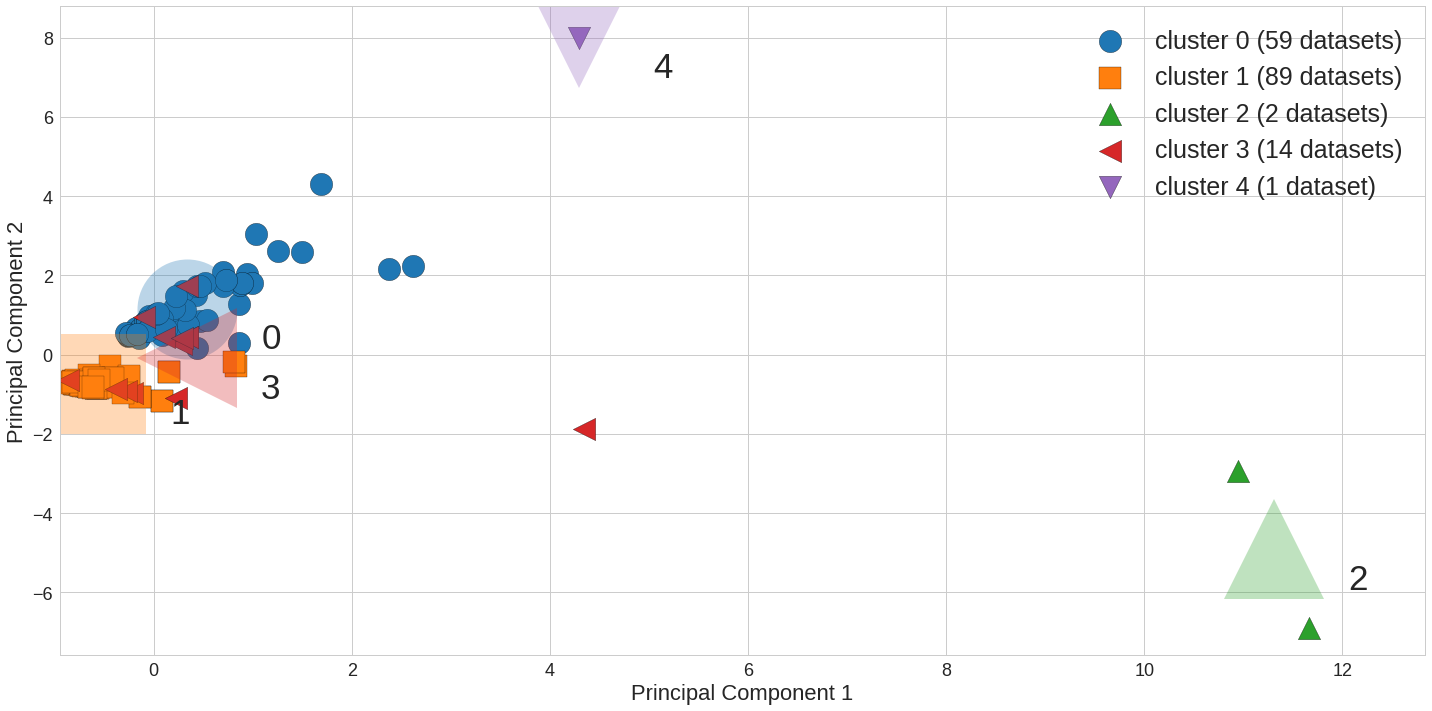

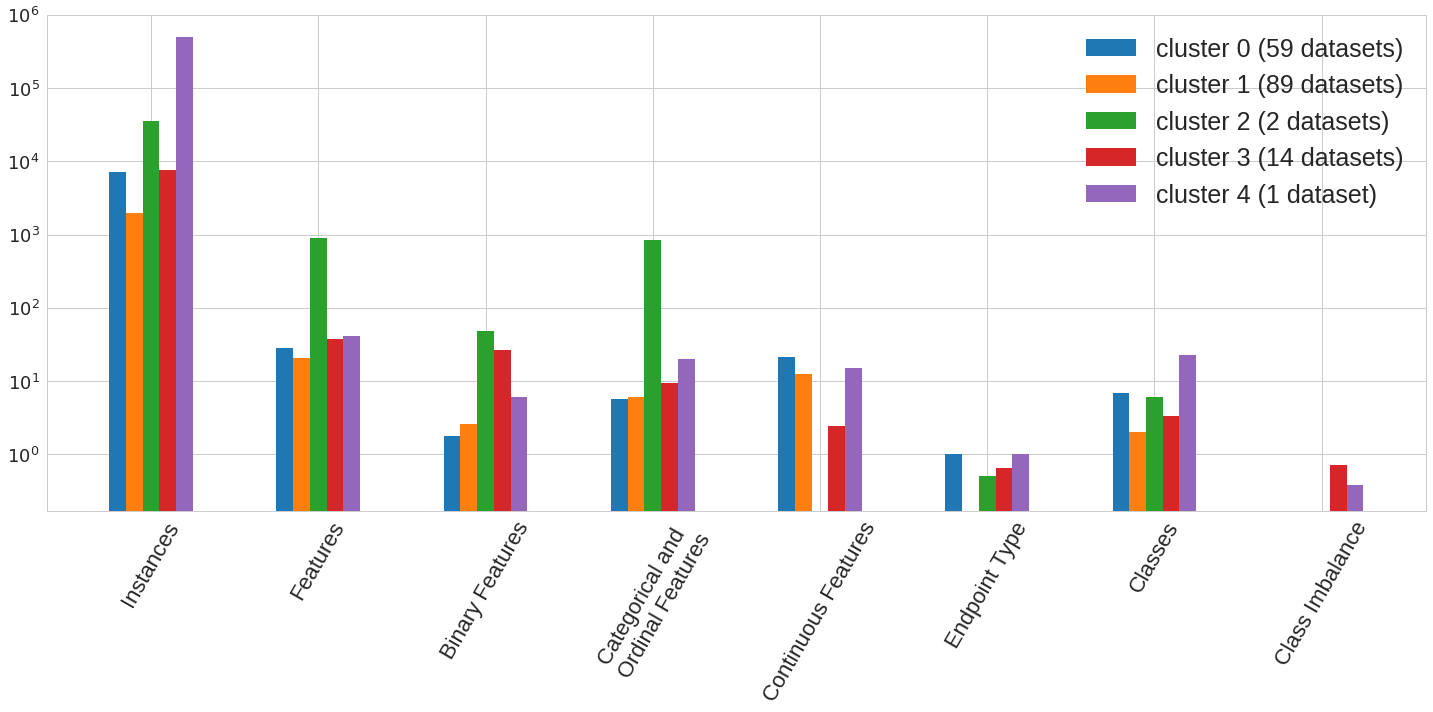

data sets in cluster 0: 16     analcatdata_authorship.csv
23           analcatdata_dmft.csv
25      analcatdata_germangss.csv
26      analcatdata_happiness.csv
32                       auto.csv
34              balance-scale.csv
43                calendarDOW.csv
45                        car.csv
46                       cars.csv
47                      cars1.csv
53          cleveland-nominal.csv
54                  cleveland.csv
55                      cloud.csv
56                        cmc.csv
59                    collins.csv
60                 confidence.csv
61                  connect-4.csv
62              contraceptive.csv
67                dermatology.csv
71                      ecoli.csv
72                       fars.csv
73                      flags.csv
76                      glass.csv
79                 hayes-roth.csv
89                       iris.csv
93                     krkopt.csv
95                      led24.csv
96                       led7.csv
97                     l

In [5]:
# =====
# plot cluster centers on 2 principal component axes
# =====
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import pdb
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)

marker =( 'o','s','^','<','v','>','+', 'x','*') 
h = plt.figure()

ss = StandardScaler()
X = ss.fit_transform(df.drop('Dataset',axis=1).values)

pca = PCA()
X_pca = pca.fit_transform(X)
print("explained variance:",np.cumsum(pca.explained_variance_ratio_) )

nc = 5
np.random.seed(42)
km = KMeans(n_clusters=nc, init='k-means++',copy_x=False,max_iter=1000).fit(X)
labels = km.labels_
centers = km.cluster_centers_

# centers_pca = centers
centers_pca = pca.transform(centers)

colors = plt.cm.Vega10((0,1,2,3,4,5))

for k, col in zip(np.unique(labels), colors):
    print('k:',k)
    print('col:',col)
    print('k%nc:',k%nc)
    label_mask = (k==labels)
    xy = X_pca[label_mask]
    coverage = np.sum(k==labels)
    if coverage==1:
        label='cluster '+str(k)+' ('+str(coverage)+' dataset)'
    else:
        label='cluster '+str(k)+' ('+str(coverage)+' datasets)'
    plt.scatter(xy[:,0], xy[:, 1], marker=marker[k%nc], facecolor=col, s=500, edgecolor='k', alpha=1,label=label)

# plt.plot(X_pca[:,0], X_pca[:, 1], linestyle = '',marker='.', markerfacecolor='k', markersize=5, alpha=1)

for k, col in zip(np.unique(labels), colors): 
    print('k:',k)
    print('col:',col)
    print('k%nc:',k%nc)
    
    plt.plot(centers_pca[k,0],centers_pca[k,1], linestyle='', marker=marker[k%nc], markerfacecolor=col,markersize=100,alpha=0.3)
    plt.text(centers_pca[k,0]+0.75,centers_pca[k,1]-1,str(k),fontsize=35)

print('labels:',labels)
print('centers:',centers_pca,len(centers_pca))

plt.xlim(min(X_pca[:,0])*1.1,max(X_pca[:,0])*1.1)
plt.ylim(min(X_pca[:,1])*1.1,max(X_pca[:,1])*1.1)
ax = plt.gca()
ax.set_axis_bgcolor('white')        
plt.xlabel('Principal Component 1',fontsize=22)
plt.ylabel('Principal Component 2',fontsize=22)
plt.legend(fontsize=25)
plt.tight_layout()
h.savefig('figs/k_means_PCA_data_by_features.pdf')
h.savefig('figs/k_means_PCA_data_by_features.png')


# show kmeans cluster center values for different features. 
print('features:',df.columns[1:])
for k in np.unique(labels):
    print('label',k)
    label_mask = (k==labels)
    xk_mean = np.mean(ss.inverse_transform(X[label_mask]),axis=0)
    for i,f in enumerate(df.columns[1:]):
        print('\t{}:\t{}'.format(f,np.round(xk_mean[i],3)))
        
        
# bar plots of cluster feature values
nice_cols = {
    '#instances': 'Instances',
    '#features': 'Features',
    '#binary_features': 'Binary Features',
    '#integer_features': 'Categorical and\n Ordinal Features',
    '#float_features': 'Continuous Features',
    'endpoint_type': 'Endpoint Type',
    '#classes': 'Classes',
    'Imbalance_metric': 'Class Imbalance'
}
h2 = plt.figure()
features = df.columns[1:].values
for k,col in zip(np.unique(labels),colors):
    label_mask = (k==labels)
    coverage = np.sum(label_mask)
    xk_mean = np.mean(ss.inverse_transform(X[label_mask]),axis=0)
    offset = k*0.1-np.mean(np.unique(labels))*0.1
    if coverage==1:
        label='cluster '+str(k)+' ('+str(coverage)+' dataset)'
    else:
        label='cluster '+str(k)+' ('+str(coverage)+' datasets)'
    plt.bar(np.arange(len(features))+offset,xk_mean,align='center',width=0.1,color=col,log=True,label=label)
# pdb.set_trace()
plt.gca().set_xticks(np.arange(len(features)))
plt.gca().set_xticklabels([nice_cols[f] for f in features],fontsize=22,rotation=60)
plt.legend(fontsize=25)
plt.tight_layout()
h2.savefig('figs/cluster_features.pdf')
h2.savefig('figs/cluster_features.png')

plt.show()

print('data sets in cluster 0:',df['Dataset'][labels==0])
print('data sets in cluster 1:',df['Dataset'][labels==1])
print('data sets in cluster 2:',df['Dataset'][labels==2])
print('data sets in cluster 3:',df['Dataset'][labels==3])

In [ ]:
#tsne manifold learning for visualizing the data
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df.drop('Dataset',axis=1).values

tsne = TSNE(n_components=2,random_state=42)

X_tsne = tsne.fit_transform(X)
# get colors from KMeans labels
nc = 6
np.random.seed(42)
km = KMeans(n_clusters=nc, init='k-means++',copy_x=False,max_iter=1000).fit(X)
labels = km.labels_
colors = plt.cm.Spectral(np.linspace(0, 1, nc))
color=[]
for l in labels:
    color.append(colors[l])
    
h = plt.figure()
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=color, cmap=plt.cm.Spectral)
h.savefig('tsne.pdf')
plt.show()

# Cluster datasets using benchmark features + algorithm performance


In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import pdb

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('report.csv',sep=',')
df['endpoint_type'] = le.fit_transform(df['endpoint_type'].values)
df = df.rename(columns={'Dataset': 'dataset'})
print(df.columns)

data = pd.read_csv('sklearn-benchmark5-data-edited.tsv.gz', sep='\t', names=['dataset',
                                                                     'classifier',
                                                                     'parameters',
                                                                     'accuracy', 
                                                                     'macrof1',
                                                                     'bal_accuracy']).fillna('')

data = data.groupby(['dataset','classifier'])['bal_accuracy'].max().reset_index()
data = data[data['classifier']!='LinearSVC']
data['bal_accuracy'] = data['bal_accuracy'].apply(lambda x: round(x, 3))
data = data.sort('dataset')
df = df.sort('dataset')
# add each classifier as a feature to df
for clf, data_clf in data.groupby('classifier'):
#     pdb.set_trace()
    df[clf] = data_clf['bal_accuracy'].values
    

KeyError: 'endpoint_type'

In [32]:
print(df.sort('#features',ascending=False))

                                               Dataset  #instances  #features  \
0    GAMETES_Epistasis_2-Way_1000atts_0.4H_EDM-1_ED...        1600       1000   
108                                          mnist.csv       70000        784   
106                                    mfeat-pixel.csv        2000        240   
102                                  mfeat-factors.csv        2000        216   
70                                             dna.csv        3186        180   
51                                          clean2.csv        6598        168   
50                                          clean1.csv         476        168   
6                           Hill_Valley_with_noise.csv        1212        100   
7                        Hill_Valley_without_noise.csv        1212        100   
114                                movement_libras.csv         360         90   
57                                        coil2000.csv        9822         85   
103                         

/home/bill/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


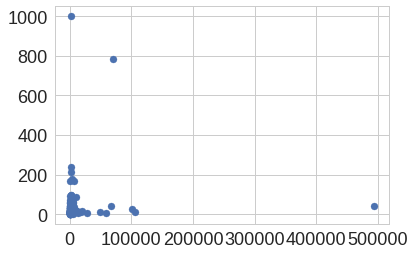

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['#instances'],df['#features'])

In [46]:
df.iloc[df['Imbalance_metric'].argmax()]


Dataset              dis.csv
#instances              3772
#features                 29
#binary_features          21
#integer_features          8
#float_features            0
endpoint_type              0
#classes                   2
Imbalance_metric     0.93944
Name: 69, dtype: object

In [51]:
from pmlb import fetch_data

d = fetch_data('dis')
d.groupby('class')['class'].count()

class
0      58
1    3714
Name: class, dtype: int64

In [56]:
2*((58/3772-1/2)**2+(3714/3772-1/2)**2)

0.9394399094067016

In [75]:
mf_small = [(d,i,f,c) for d,i,f,c in zip(df['Dataset'],df['#instances'],df['#features'],df['#classes']) if c>2 and i<1000]
inst = [m[1] for m in mf_small]
mf_small = [mf_small[i] for i in np.argsort(inst)]
print('name','instances','features','classes')
for m in mf_small: print(m)

name instances features classes
('analcatdata_happiness.csv', 60, 3, 3)
('confidence.csv', 72, 3, 6)
('cloud.csv', 108, 7, 4)
('lymphography.csv', 148, 18, 4)
('iris.csv', 150, 4, 3)
('tae.csv', 151, 5, 3)
('hayes-roth.csv', 160, 4, 3)
('flags.csv', 178, 43, 5)
('wine-recognition.csv', 178, 13, 3)
('auto.csv', 202, 25, 5)
('prnn_fglass.csv', 205, 9, 5)
('glass.csv', 205, 9, 5)
('new-thyroid.csv', 215, 5, 3)
('cleveland-nominal.csv', 303, 7, 5)
('cleveland.csv', 303, 13, 5)
('solar-flare_1.csv', 315, 12, 5)
('ecoli.csv', 327, 7, 5)
('movement_libras.csv', 360, 90, 15)
('dermatology.csv', 366, 34, 6)
('cars1.csv', 392, 7, 3)
('cars.csv', 392, 8, 3)
('calendarDOW.csv', 399, 32, 5)
('analcatdata_germangss.csv', 400, 5, 4)
('collins.csv', 485, 23, 13)
('balance-scale.csv', 625, 4, 3)
('soybean.csv', 675, 35, 18)
('analcatdata_dmft.csv', 797, 4, 6)
('analcatdata_authorship.csv', 841, 70, 4)
('vehicle.csv', 846, 18, 4)
('vowel.csv', 990, 13, 11)


In [74]:
mf_small[:][1]

('analcatdata_dmft.csv', 797, 4, 6)